***Exploratory Data Analysis for EPL Data from 2018 - 2019 by Gempar***

# Objectives

1. Is this data clean?
2. How is the point distribution of the epl team? and which team is an anomaly?
3. Best Attack Team
4. Best Defence Team
5. Team with good financial aspect
6. Explore the dataset

## Load Dataset

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/gemps/EPL-case/main/epl_1819.csv'

EPL = pd.read_csv(url,index_col=0)
EPL

,category,general_league_position,finance _live_games_televised,finance _tv_revenue,general_matches_played,general_won,general_draw,general_lost,attack_scored,defence_goals_conceeded,...,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy
Team,,,,,,,,,,,,,,,,,,,,,
Manchester City,Champions League,1,26,150986355,38,32,2,4,95,23,...,58,63,362,518,0,543,295,4,64.0,89.0
Liverpool,Champions League,2,29,152425146,38,30,7,1,89,22,...,76,78,314,610,2,639,317,1,58.8,84.4
Chelsea,Champions League Qualification,3,25,146030216,38,21,9,8,63,39,...,85,73,351,618,2,593,330,2,59.9,87.6
Tottenham,Champions League Qualification,4,26,145230801,38,23,2,13,67,39,...,121,112,326,626,3,770,411,5,56.7,83.2
Arsenal,Europa League,5,25,142193180,38,21,7,10,73,51,...,133,118,412,609,2,762,404,7,56.1,83.3
Manchester United,Europa League,6,27,142512868,38,19,9,10,65,54,...,122,128,355,581,2,785,370,6,53.3,82.3
Wolverhampton,Europa League Qualification,7,15,127165114,38,16,9,13,47,46,...,100,148,501,720,2,824,464,4,47.4,78.2
Everton,No UEFA Competitions,8,18,128603905,38,15,9,14,54,46,...,94,85,456,700,4,825,430,5,51.0,77.3
Leicester,No UEFA Competitions,9,15,123328078,38,15,7,16,51,48,...,90,96,436,676,4,945,500,5,50.8,79.2


In [3]:
EPL.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, Manchester City to Huddersfield
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   category                       20 non-null     object 
 1   general_league_position        20 non-null     int64  
 2   finance _live_games_televised  20 non-null     int64  
 3   finance _tv_revenue            20 non-null     int64  
 4   general_matches_played         20 non-null     int64  
 5   general_won                    20 non-null     int64  
 6   general_draw                   20 non-null     int64  
 7   general_lost                   20 non-null     int64  
 8   attack_scored                  20 non-null     int64  
 9   defence_goals_conceeded        20 non-null     int64  
 10  general_goal_difference        20 non-null     int64  
 11  general_points                 20 non-null     int64  
 12  general_squad_size             20

# Objectives 1

From the dataset info, there are 4 datas that should not be of type object. We have to change it to integer / float

In [4]:
EPL['attack_passes'] = EPL['attack_passes'].replace({',': ''}, regex=True).astype('int64')
EPL['attack_passes_long'] = EPL['attack_passes_long'].replace({',': ''}, regex=True).astype('int64')
EPL['attack_passes_back'] = EPL['attack_passes_back'].replace({',': ''}, regex=True).astype('int64')
EPL['defence_clearances'] = EPL['defence_clearances'].replace({',': ''}, regex=True).astype('int64')
EPL.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, Manchester City to Huddersfield
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   category                       20 non-null     object 
 1   general_league_position        20 non-null     int64  
 2   finance _live_games_televised  20 non-null     int64  
 3   finance _tv_revenue            20 non-null     int64  
 4   general_matches_played         20 non-null     int64  
 5   general_won                    20 non-null     int64  
 6   general_draw                   20 non-null     int64  
 7   general_lost                   20 non-null     int64  
 8   attack_scored                  20 non-null     int64  
 9   defence_goals_conceeded        20 non-null     int64  
 10  general_goal_difference        20 non-null     int64  
 11  general_points                 20 non-null     int64  
 12  general_squad_size             20

In [5]:
clean = EPL.reset_index()
clean

,Team,category,general_league_position,finance _live_games_televised,finance _tv_revenue,general_matches_played,general_won,general_draw,general_lost,attack_scored,...,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy
0,Manchester City,Champions League,1,26,150986355,38,32,2,4,95,...,58,63,362,518,0,543,295,4,64.0,89.0
1,Liverpool,Champions League,2,29,152425146,38,30,7,1,89,...,76,78,314,610,2,639,317,1,58.8,84.4
2,Chelsea,Champions League Qualification,3,25,146030216,38,21,9,8,63,...,85,73,351,618,2,593,330,2,59.9,87.6
3,Tottenham,Champions League Qualification,4,26,145230801,38,23,2,13,67,...,121,112,326,626,3,770,411,5,56.7,83.2
4,Arsenal,Europa League,5,25,142193180,38,21,7,10,73,...,133,118,412,609,2,762,404,7,56.1,83.3
5,Manchester United,Europa League,6,27,142512868,38,19,9,10,65,...,122,128,355,581,2,785,370,6,53.3,82.3
6,Wolverhampton,Europa League Qualification,7,15,127165114,38,16,9,13,47,...,100,148,501,720,2,824,464,4,47.4,78.2
7,Everton,No UEFA Competitions,8,18,128603905,38,15,9,14,54,...,94,85,456,700,4,825,430,5,51.0,77.3
8,Leicester,No UEFA Competitions,9,15,123328078,38,15,7,16,51,...,90,96,436,676,4,945,500,5,50.8,79.2
9,West Ham,No UEFA Competitions,10,16,122528663,38,15,7,16,52,...,148,141,457,723,5,855,397,5,49.0,78.7


Renaming column without space, to better processing for modelling

In [6]:
clean = clean.rename(columns = {'finance _live_games_televised': 'finance_live_games_televised', 'finance _tv_revenue': 'finance_tv_revenue', 'finance _team_market': 'finance_team_market', 'finance _market_average': 'finance_market_average'}, inplace = False)
clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Team                          20 non-null     object 
 1   category                      20 non-null     object 
 2   general_league_position       20 non-null     int64  
 3   finance_live_games_televised  20 non-null     int64  
 4   finance_tv_revenue            20 non-null     int64  
 5   general_matches_played        20 non-null     int64  
 6   general_won                   20 non-null     int64  
 7   general_draw                  20 non-null     int64  
 8   general_lost                  20 non-null     int64  
 9   attack_scored                 20 non-null     int64  
 10  defence_goals_conceeded       20 non-null     int64  
 11  general_goal_difference       20 non-null     int64  
 12  general_points                20 non-null     int64  
 13  general

# Objectives 2

Poin distribution of EPL team

In [7]:
Outliers = EPL [['general_points', 'attack_scored', 'defence_goals_conceeded', 'general_goal_difference', 'finance _team_market','finance _market_average']]
Outliers

,general_points,attack_scored,defence_goals_conceeded,general_goal_difference,finance _team_market,finance _market_average
Team,,,,,,
Manchester City,98,95,23,72,1003200000,39987200
Liverpool,97,89,22,67,836440000,34848000
Chelsea,72,63,39,24,779460000,29981600
Tottenham,71,67,39,28,735240000,29409600
Arsenal,70,73,51,22,701800000,26989600
Manchester United,66,65,54,11,550440000,22017600
Wolverhampton,57,47,46,1,369600000,16068800
Everton,54,54,46,8,305360000,11748000
Leicester,52,51,48,3,284240000,10929600


<function matplotlib.pyplot.show(*args, **kw)>

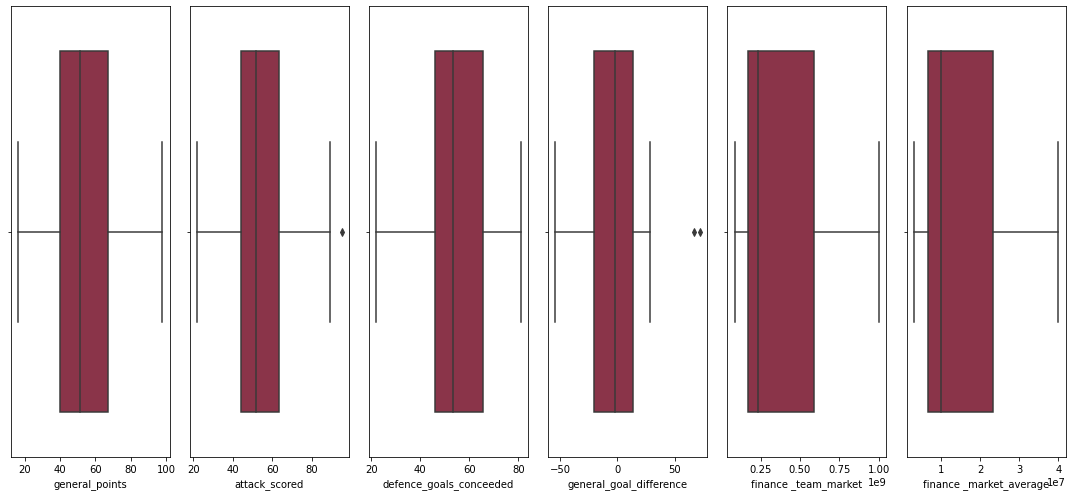

In [8]:
check_outliers = ['general_points', 'attack_scored', 'defence_goals_conceeded', 'general_goal_difference', 'finance _team_market','finance _market_average']
plt.figure(figsize=(15, 7))
for i in range(0, len(check_outliers)):
    plt.subplot(1, 6, i+1)
    sns.boxplot(EPL[check_outliers[i]],color='#982642')
    plt.tight_layout()
plt.show

Validate which team is anomaly with some variable

### Anomaly ---  Attack Score

In [9]:
Q1 = EPL ['attack_scored'].quantile(0.25)
Q3 = EPL['attack_scored'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries = ((EPL['attack_scored'] >= low_limit) & (EPL['attack_scored'] <= high_limit))
filtered_entries

Team
Manchester City      False
Liverpool             True
Chelsea               True
Tottenham             True
Arsenal               True
Manchester United     True
Wolverhampton         True
Everton               True
Leicester             True
West Ham              True
Watford               True
Crystal Palace        True
Newcastle             True
 Bournemouth          True
Burnley               True
Southampton           True
Brighton              True
Cardiff               True
Fulham                True
Huddersfield          True
Name: attack_scored, dtype: bool

### Anomaly ---  Goal Difference

In [10]:
Q1_goal = EPL ['general_goal_difference'].quantile(0.25)
Q3_goal = EPL['general_goal_difference'].quantile(0.75)
IQR_goal = Q3_goal - Q1_goal
low_limit_goal = Q1_goal - (1.5 * IQR_goal)
high_limit_goal = Q3_goal + (1.5 * IQR_goal)
filtered_entries_goal = ((EPL['general_goal_difference'] >= low_limit_goal) & (EPL['general_goal_difference'] <= high_limit_goal))
filtered_entries_goal

Team
Manchester City      False
Liverpool            False
Chelsea               True
Tottenham             True
Arsenal               True
Manchester United     True
Wolverhampton         True
Everton               True
Leicester             True
West Ham              True
Watford               True
Crystal Palace        True
Newcastle             True
 Bournemouth          True
Burnley               True
Southampton           True
Brighton              True
Cardiff               True
Fulham                True
Huddersfield          True
Name: general_goal_difference, dtype: bool

# Objectives 3

Best Attack Team

In [11]:
attack = clean [['Team', 'attack_scored', 'attack_shots', 'attack_shots_on_target', 'attack_goals_penalty', 'attack_goals_freekick', 'attack_goals_counter']]
attack

,Team,attack_scored,attack_shots,attack_shots_on_target,attack_goals_penalty,attack_goals_freekick,attack_goals_counter
0,Manchester City,95,683,260,3,2,5
1,Liverpool,89,575,226,7,1,6
2,Chelsea,63,607,198,5,1,1
3,Tottenham,67,537,189,4,2,5
4,Arsenal,73,467,170,4,3,3
5,Manchester United,65,526,225,9,2,4
6,Wolverhampton,47,477,152,4,2,5
7,Everton,54,498,169,2,0,3
8,Leicester,51,515,184,5,3,8
9,West Ham,52,441,157,5,0,3


In [12]:
attack ['real_goal'] = attack.attack_scored - (attack.attack_goals_penalty + attack.attack_goals_freekick)
attack ['precision_attack%'] = (attack.attack_shots_on_target / attack.attack_shots)*100
attack

<ipython-input-12-ee1499302c1f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attack ['real_goal'] = attack.attack_scored - (attack.attack_goals_penalty + attack.attack_goals_freekick)
<ipython-input-12-ee1499302c1f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attack ['precision_attack%'] = (attack.attack_shots_on_target / attack.attack_shots)*100


,Team,attack_scored,attack_shots,attack_shots_on_target,attack_goals_penalty,attack_goals_freekick,attack_goals_counter,real_goal,precision_attack%
0,Manchester City,95,683,260,3,2,5,90,38.067350
1,Liverpool,89,575,226,7,1,6,81,39.304348
2,Chelsea,63,607,198,5,1,1,57,32.619440
3,Tottenham,67,537,189,4,2,5,61,35.195531
4,Arsenal,73,467,170,4,3,3,66,36.402570
5,Manchester United,65,526,225,9,2,4,54,42.775665
6,Wolverhampton,47,477,152,4,2,5,41,31.865828
7,Everton,54,498,169,2,0,3,52,33.935743
8,Leicester,51,515,184,5,3,8,43,35.728155
9,West Ham,52,441,157,5,0,3,47,35.600907


Best Attack by Precision Attack

In [13]:
Best1 = attack.sort_values(by='precision_attack%', ascending=False)
Best1 [['Team', 'precision_attack%']].head()

,Team,precision_attack%
5,Manchester United,42.775665
1,Liverpool,39.304348
0,Manchester City,38.067350
13,Bournemouth,36.547085
4,Arsenal,36.402570


Best Attack by Real Goal

In [14]:
Best2 = attack.sort_values(by='real_goal', ascending=False)
Best2 [['Team', 'attack_scored', 'real_goal']].head()

,Team,attack_scored,real_goal
0,Manchester City,95,90
1,Liverpool,89,81
4,Arsenal,73,66
3,Tottenham,67,61
2,Chelsea,63,57


# Objectives 4

Best Defend Team

In [15]:
defend = clean [['Team', 'defence_goals_conceeded', 'defence_penalty_conceeded', 'defence_saves', 'defence_blocks', 'defence_tackles', 'defence_clearances', 'defence_clearances_headed']]
defend

,Team,defence_goals_conceeded,defence_penalty_conceeded,defence_saves,defence_blocks,defence_tackles,defence_clearances,defence_clearances_headed
0,Manchester City,23,4,58,63,518,543,295
1,Liverpool,22,1,76,78,610,639,317
2,Chelsea,39,2,85,73,618,593,330
3,Tottenham,39,5,121,112,626,770,411
4,Arsenal,51,7,133,118,609,762,404
5,Manchester United,54,6,122,128,581,785,370
6,Wolverhampton,46,4,100,148,720,824,464
7,Everton,46,5,94,85,700,825,430
8,Leicester,48,5,90,96,676,945,500
9,West Ham,55,5,148,141,723,855,397


In [16]:
defend ['real_conceded'] = defend.defence_goals_conceeded - defend.defence_penalty_conceeded
defend ['defend_point'] = defend.iloc[:,3:].apply(lambda x: x.sum(),axis=1)
defend = defend [['Team', 'real_conceded', 'defend_point']]
defend

<ipython-input-16-097bb82bc40e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defend ['real_conceded'] = defend.defence_goals_conceeded - defend.defence_penalty_conceeded
<ipython-input-16-097bb82bc40e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defend ['defend_point'] = defend.iloc[:,3:].apply(lambda x: x.sum(),axis=1)


,Team,real_conceded,defend_point
0,Manchester City,19,1496
1,Liverpool,21,1741
2,Chelsea,37,1736
3,Tottenham,34,2074
4,Arsenal,44,2070
5,Manchester United,48,2034
6,Wolverhampton,42,2298
7,Everton,41,2175
8,Leicester,43,2350
9,West Ham,50,2314


Best Defend by Defend Point

In [17]:
defend1 = defend.sort_values(by='defend_point', ascending=False)
defend1 [['Team', 'defend_point']].head()

,Team,defend_point
12,Newcastle,2668
14,Burnley,2627
15,Southampton,2598
11,Crystal Palace,2439
16,Brighton,2432


Best Defend by Real Conceded

In [18]:
defend2 = defend.sort_values(by='real_conceded')
defend2 [['Team', 'real_conceded']].head()

,Team,real_conceded
0,Manchester City,19
1,Liverpool,21
3,Tottenham,34
2,Chelsea,37
7,Everton,41


# Objectives 5

Team who has good financial aspect

In [19]:
value = clean [['Team', 'general_squad_size', 'finance_live_games_televised', 'finance_tv_revenue', 'finance_team_market', 'finance_market_average']]
value

,Team,general_squad_size,finance_live_games_televised,finance_tv_revenue,finance_team_market,finance_market_average
0,Manchester City,25,26,150986355,1003200000,39987200
1,Liverpool,24,29,152425146,836440000,34848000
2,Chelsea,26,25,146030216,779460000,29981600
3,Tottenham,25,26,145230801,735240000,29409600
4,Arsenal,26,25,142193180,701800000,26989600
5,Manchester United,26,27,142512868,550440000,22017600
6,Wolverhampton,23,15,127165114,369600000,16068800
7,Everton,26,18,128603905,305360000,11748000
8,Leicester,26,15,123328078,284240000,10929600
9,West Ham,26,16,122528663,234212000,9011200


Good financial = good revenue for team

In [20]:
#calculate how much revenue live per match from teams
value ['price_per_live'] = round(value.finance_tv_revenue / value.finance_live_games_televised)
value

<ipython-input-20-dde9f6a8eb4c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  value ['price_per_live'] = round(value.finance_tv_revenue / value.finance_live_games_televised)


,Team,general_squad_size,finance_live_games_televised,finance_tv_revenue,finance_team_market,finance_market_average,price_per_live
0,Manchester City,25,26,150986355,1003200000,39987200,5807168.0
1,Liverpool,24,29,152425146,836440000,34848000,5256040.0
2,Chelsea,26,25,146030216,779460000,29981600,5841209.0
3,Tottenham,25,26,145230801,735240000,29409600,5585800.0
4,Arsenal,26,25,142193180,701800000,26989600,5687727.0
5,Manchester United,26,27,142512868,550440000,22017600,5278254.0
6,Wolverhampton,23,15,127165114,369600000,16068800,8477674.0
7,Everton,26,18,128603905,305360000,11748000,7144661.0
8,Leicester,26,15,123328078,284240000,10929600,8221872.0
9,West Ham,26,16,122528663,234212000,9011200,7658041.0


In [21]:
live_value = value.sort_values(by='price_per_live', ascending=False)
live_value [['Team', 'price_per_live']]

,Team,price_per_live
10,Watford,11389553.0
13,Bournemouth,10813997.0
15,Southampton,10430294.0
14,Burnley,9758233.0
19,Huddersfield,9662886.0
11,Crystal Palace,9517935.0
17,Cardiff,8558676.0
6,Wolverhampton,8477674.0
8,Leicester,8221872.0
16,Brighton,8133979.0


# Objectives 6

Explore more with Power BI visualization